## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Data Loading

In [3]:
df= pd.read_csv("data/Bengaluru_House_Data_cleaned.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7692 entries, 0 to 7691
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   area_type      7692 non-null   object 
 1   location       7692 non-null   object 
 2   total_sqft     7692 non-null   float64
 3   bath           7692 non-null   float64
 4   balcony        7692 non-null   float64
 5   price          7692 non-null   float64
 6   bedroom        7692 non-null   float64
 7   ready_to_move  7692 non-null   int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 480.9+ KB


In [5]:
df['ready_to_move'] = df['ready_to_move'].astype('object')

## Numerical Features

In [6]:
df.describe()

,total_sqft,bath,balcony,price,bedroom
count,7692.000000,7692.000000,7692.000000,7692.000000,7692.000000
mean,1414.245113,2.524181,1.550832,99.710992,2.604004
std,618.567995,1.129762,0.791248,83.473433,1.096904
min,250.000000,1.000000,0.000000,8.000000,1.000000
25%,1080.000000,2.000000,1.000000,50.605000,2.000000
50%,1250.000000,2.000000,2.000000,75.000000,2.000000
75%,1645.000000,3.000000,2.000000,120.000000,3.000000
max,10000.000000,27.000000,3.000000,1250.000000,27.000000


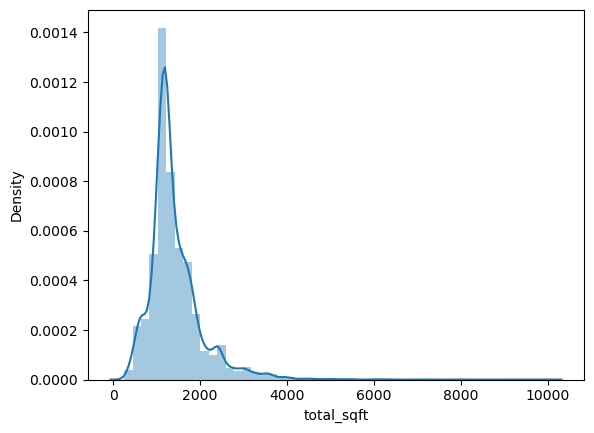

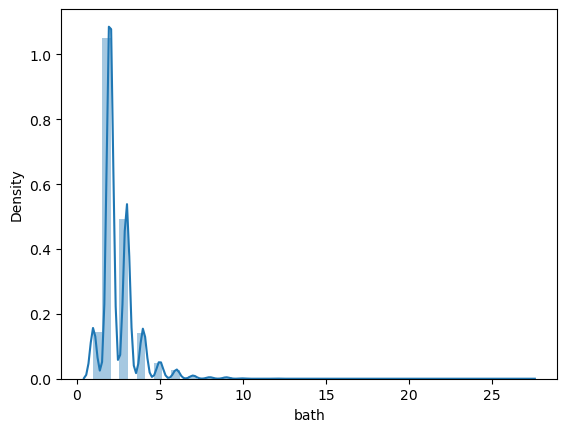

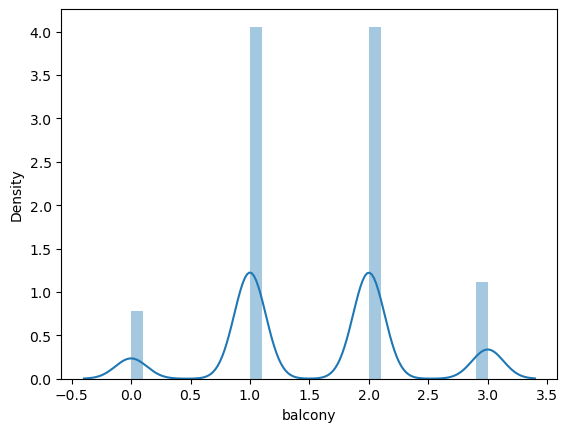

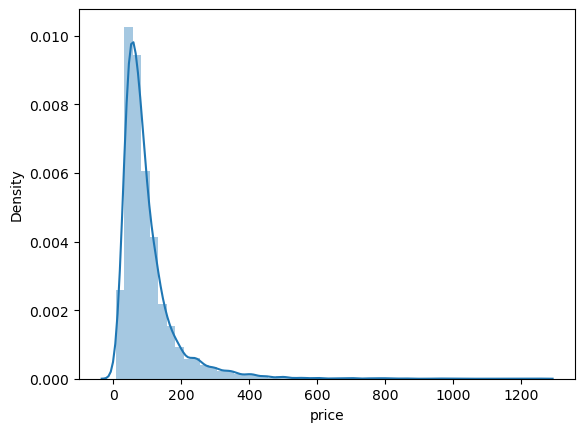

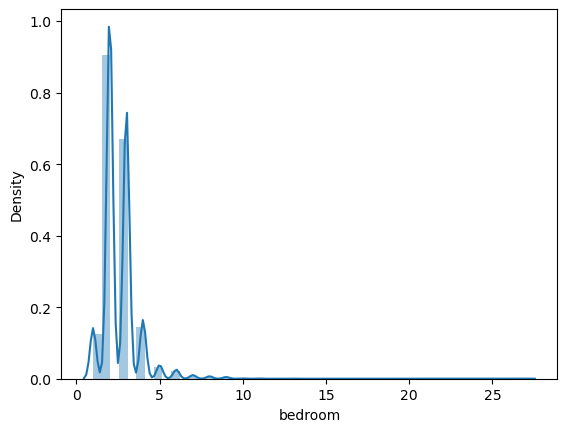

In [7]:
df_numerical = df.select_dtypes(exclude = ['object'])
for feature in df_numerical:
    sns.distplot(df[feature])
    plt.show()

### Correlation between numerical features

<AxesSubplot:>

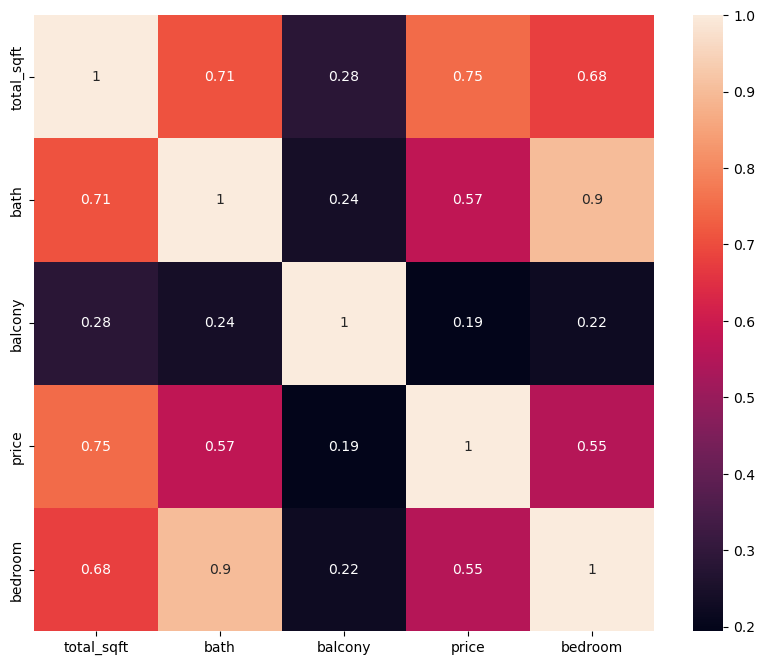

In [8]:
corr = df.corr()
plt.figure(figsize = (10,8))
sns.heatmap(corr, annot= True)

From the heatmap we can observe that:
- there is a strong positive correlation between 'total_sqft' and 'price', 
- 'bath' and 'bedroom' exhibit high positive correlations with 'price', suggesting that properties with more bathrooms and bedrooms tend to be priced higher
- 'bath' and 'bedroom' are strongly positive correlated with each other

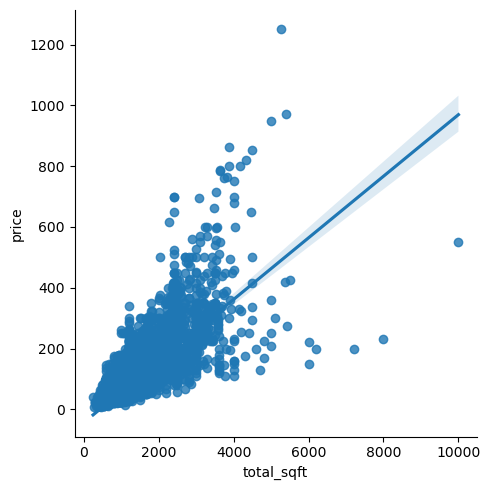

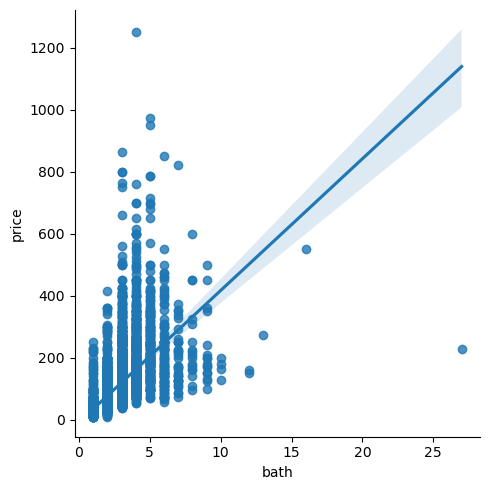

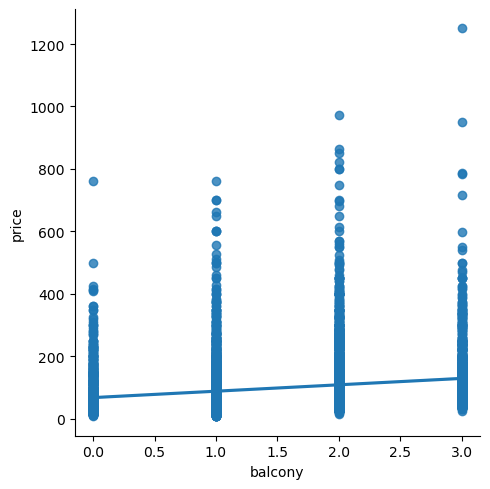

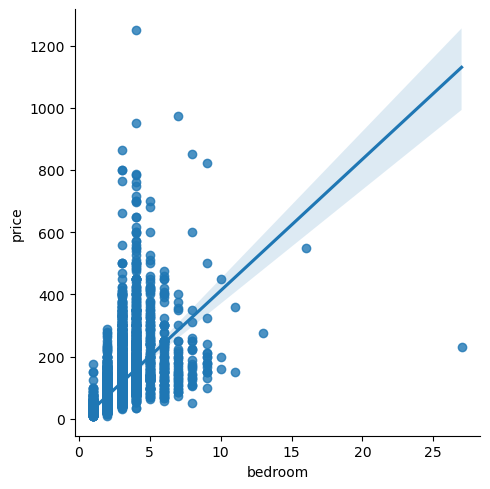

In [9]:
df_numerical_features = df_numerical.drop(['price'], axis = 1 )
for col in df_numerical_features.columns:
    sns.lmplot(x = col, y = 'price', data = df)

From the above plots we can see that:

- as the total square feet of a house increases, the price also tends to increase.
- higher bathroom counts generally associated with higher prices.
- higher bedroom counts generally associated with higher prices.
- having more balconies is associated with a higher sale price, although the effect is somewhat smaller in magnitude compared to other variables

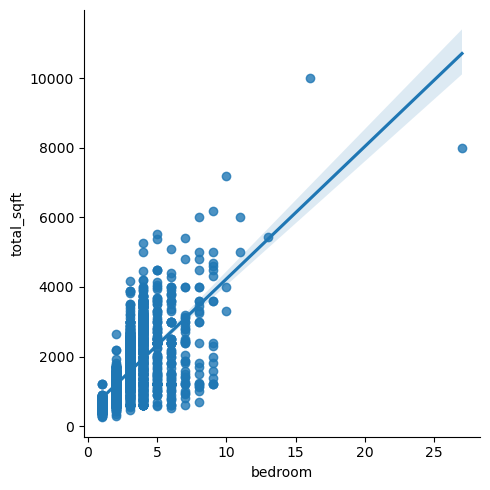

In [10]:
sns.lmplot(x = 'bedroom', y = 'total_sqft', data = df)

Higher bedroom counts generally associated with larger area of a house.

## Categorical Features

In [11]:
df_cat_features = df[['area_type', 'location','ready_to_move']]

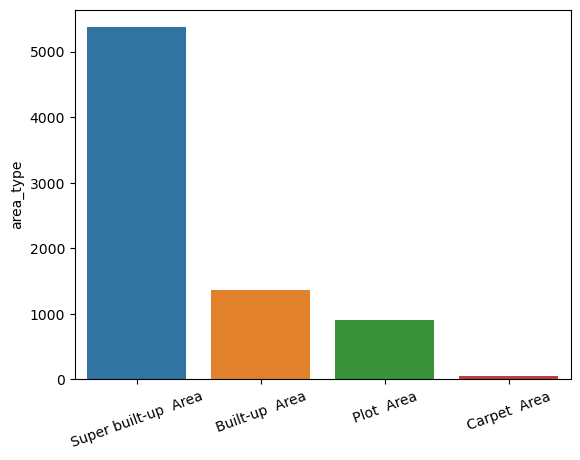

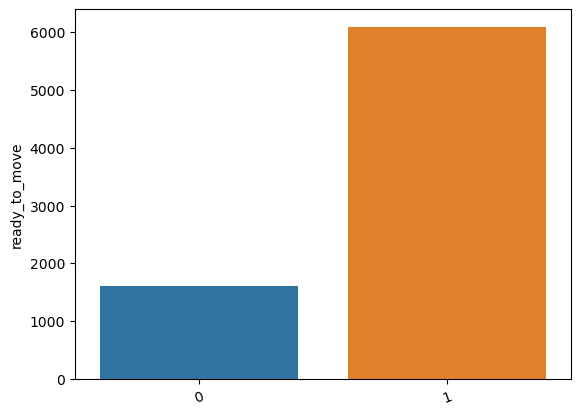

In [12]:
df_cat_features_wo_location = df_cat_features.drop(['location'], axis = 1)
for col in df_cat_features_wo_location.columns:
    cat_num = df_cat_features_wo_location[col].value_counts()
    chart = sns.barplot(x = cat_num.index, y = cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation = 20)
    plt.show()

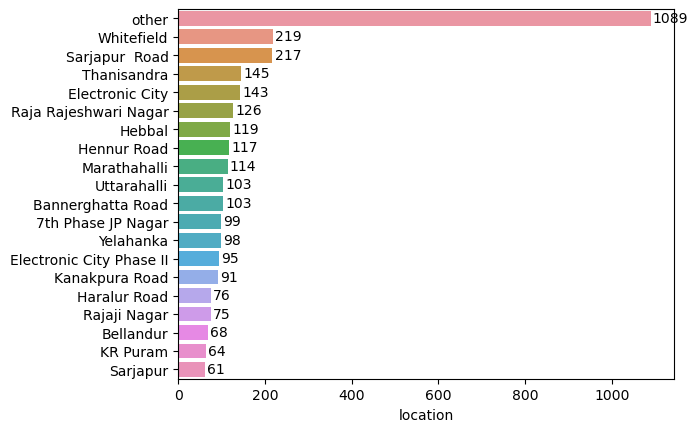

In [13]:
location_num = df_cat_features['location'].value_counts()[:20]
chart = sns.barplot(x = location_num, y = location_num.index)

# Add value counts to the end of the bars
for i, v in enumerate(location_num):
    chart.text(v + 5, i + 0.2, str(v), color='black', fontsize=10)
    
plt.show()

### Top 10 locations with the highest price

In [14]:
count_by_location = df['location'].value_counts()

pd.pivot_table(df, index = ['location'], values = 'price') \
  .assign(count = count_by_location) \
  .sort_values('price', ascending = False)[:10]

,price,count
location,,
Cunningham Road,744.555556,9
Kodihalli,436.916667,12
Benson Town,346.743333,15
HAL 2nd Stage,339.272727,11
Giri Nagar,309.727273,11
Mahalakshmi Layout,294.846154,13
Rajaji Nagar,279.055467,75
Indira Nagar,277.750000,32
Iblur Village,236.000000,18


### Top 10 locations with the lowest price

In [15]:
pd.pivot_table(df, index = ['location'], values = 'price') \
  .assign(count = count_by_location) \
  .sort_values('price', ascending = True)[:10]

,price,count
location,,
Attibele,25.788889,27
Ananth Nagar,28.245217,23
Chandapura,31.483152,46
Kereguddadahalli,33.258333,12
Anekal,33.922727,22
Bommasandra Industrial Area,36.902222,18
Kammasandra,38.079474,19
Sarjapura - Attibele Road,38.631667,12
Channasandra,39.807308,26


One observation is that the locations with the highest and lowest prices tend to have lower counts.

### 'ready_to_move'

In [16]:
ready_to_move_price = df.groupby('ready_to_move')['price'].mean()
ready_to_move_price

ready_to_move
0     88.182509
1    102.757968
Name: price, dtype: float64

<AxesSubplot:xlabel='ready_to_move', ylabel='price'>

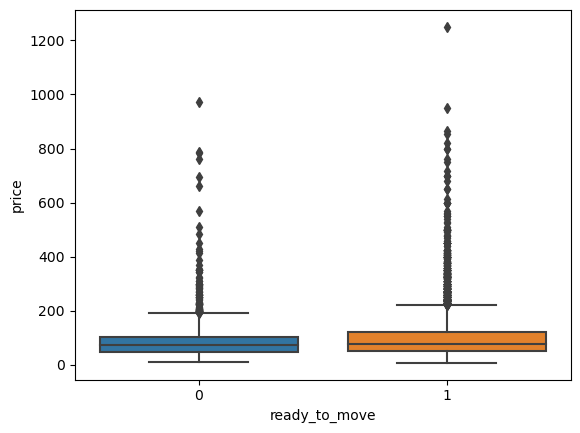

In [17]:
sns.boxplot(x='ready_to_move', y='price', data=df)

Houses that are move-in ready are on average **more expensive** than houses that are still under construction. 

### 'area_type'

In [18]:
ready_to_move_price = df.groupby('area_type')['price'].mean().sort_values(ascending = False)
ready_to_move_price

area_type
Plot  Area              158.428837
Built-up  Area           93.749551
Carpet  Area             92.739298
Super built-up  Area     91.424084
Name: price, dtype: float64

<AxesSubplot:xlabel='area_type', ylabel='price'>

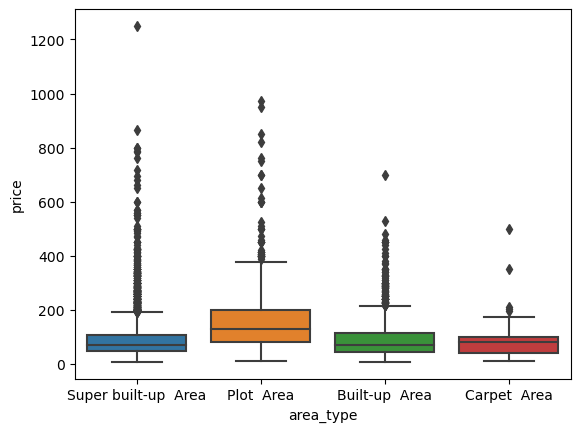

In [19]:
sns.boxplot(x='area_type', y='price', data=df)

In [20]:
pt = pd.pivot_table(df, index = 'location', columns = 'ready_to_move', values = 'price')
pt.dropna(inplace = True)

### Location where move-in ready house are more expensive.

In [21]:
pt1 = pt[pt[1] > pt[0]].sort_values(1, ascending = False)
pt1

ready_to_move,0,1
location,,
Cunningham Road,712.500000,753.714286
HAL 2nd Stage,140.000000,383.555556
Giri Nagar,175.000000,323.200000
Rajaji Nagar,113.741818,307.468750
Iblur Village,139.600000,273.076923
...,...,...
Sarjapura - Attibele Road,25.605000,41.237000
Kammasandra,32.064000,40.227857
Chandapura,23.286250,37.788462


In [22]:
len(pt1)

83

### Location where non-move-in ready house are more expensive.

In [23]:
pt0 = pt[pt[1] < pt[0]].sort_values(0, ascending = False)
pt0

ready_to_move,0,1
location,,
Kodihalli,664.250000,323.250000
Konanakunte,367.000000,156.600000
HBR Layout,320.000000,103.555556
Indira Nagar,312.000000,276.645161
Domlur,285.000000,125.888889
...,...,...
Banashankari Stage V,49.852500,48.905714
Kambipura,45.000000,44.319091
Bommasandra,44.240000,35.222222


In [24]:
len(pt0)

75